In [1]:
import cv2
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
gen = [glob.glob('C:/Users/Pallavi Pandey/SIGNATURE/sign_data/sign_data/test/049/*.*'),
       glob.glob('C:/Users/Pallavi Pandey/SIGNATURE/sign_data/sign_data/test/050/*.*'),
       glob.glob('C:/Users/Pallavi Pandey/SIGNATURE/sign_data/sign_data/test/051/*.*'),
       glob.glob('C:/Users/Pallavi Pandey/SIGNATURE/sign_data/sign_data/test/052/*.*')]

forg = [glob.glob('C:/Users/Pallavi Pandey/SIGNATURE/sign_data/sign_data/test/049_forg/*.*'),
        glob.glob('C:/Users/Pallavi Pandey/SIGNATURE/sign_data/sign_data/test/050_forg/*.*'),
        glob.glob('C:/Users/Pallavi Pandey/SIGNATURE/sign_data/sign_data/test/051_forg/*.*'),
        glob.glob('C:/Users/Pallavi Pandey/SIGNATURE/sign_data/sign_data/test/052_forg/*.*')]



In [3]:
def load_images(file_list):
    images = []
    for files in file_list:
        for file in files:
            img = cv2.imread(file)
            images.append(img)
    return images

In [4]:
gen_imgs = load_images(gen)
forg_imgs = load_images(forg)

In [7]:
num_gen = sum([len(x) for x in gen])
num_forg = sum([len(x) for x in forg])
print(f"Number of real signatures: {num_gen}")
print(f"Number of forged signatures: {num_forg}")

Number of real signatures: 48
Number of forged signatures: 48


In [28]:
if num_gen == num_forg:
    print("The dataset is balanced.")
else:
    print("The dataset is not balanced.")

The dataset is balanced.


In [29]:
gen_shape = [x.shape for x in gen_imgs]
forg_shape = [x.shape for x in forg_imgs]
print("Shape of real images: ", gen_shape[:5])
print("Shape of forged images: ", forg_shape[:5])

gen_color = [x.shape[2] for x in gen_imgs]
forg_color = [x.shape[2] for x in forg_imgs]
print("Color channels of real images: ", gen_color[:5])
print("Color channels of forged images: ", forg_color[:5])

gen_pixels = [x.mean() for x in gen_imgs]
forg_pixels = [x.mean() for x in forg_imgs]
print("Mean pixel values of real images: ", gen_pixels[:5])
print("Mean pixel values of forged images: ", forg_pixels[:5])

Shape of real images:  [(323, 670, 3), (507, 589, 3), (522, 755, 3), (537, 653, 3), (405, 615, 3)]
Shape of forged images:  [(308, 497, 3), (221, 470, 3), (253, 596, 3), (253, 620, 3), (267, 504, 3)]
Color channels of real images:  [3, 3, 3, 3, 3]
Color channels of forged images:  [3, 3, 3, 3, 3]
Mean pixel values of real images:  [245.49644193891226, 245.2841297109287, 246.555362715993, 246.75935637743194, 246.11248954464853]
Mean pixel values of forged images:  [239.9103364777409, 244.1753570167838, 241.8168731375618, 239.30513621488376, 244.7009368250005]


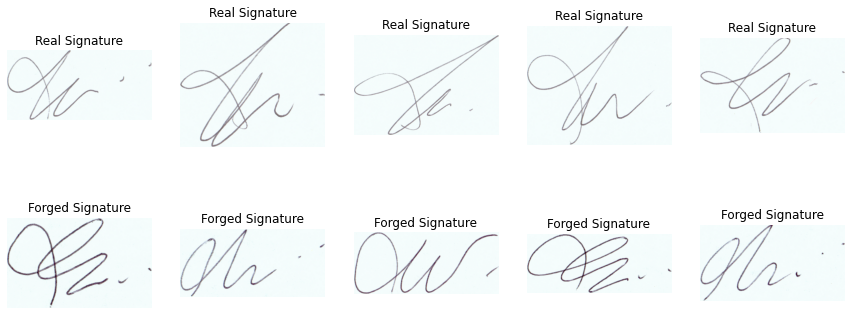

In [30]:
fig, axs = plt.subplots(2, 5, figsize=(15, 6))
for i in range(5):
    axs[0, i].imshow(cv2.cvtColor(gen_imgs[i], cv2.COLOR_BGR2RGB))
    axs[0, i].set_title("Real Signature")
    axs[0, i].axis("off")
    
    axs[1, i].imshow(cv2.cvtColor(forg_imgs[i], cv2.COLOR_BGR2RGB))
    axs[1, i].set_title("Forged Signature")
    axs[1, i].axis("off")
    
plt.show()

In [31]:
image_data = pd.DataFrame(columns=['Type', 'Shape', 'Color Channels', 'Mean Pixel Value'])

In [32]:
for i in range(len(gen_shape)):
    image_data = image_data.append({'Type': 'Real','Shape': gen_shape[i], 'Color Channels': gen_color[i], 'Mean Pixel Value': gen_pixels[i]}, ignore_index=True)
    

C:\Users\Pallavi Pandey\AppData\Local\Temp\ipykernel_15092\3095636065.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_data = image_data.append({'Type': 'Real','Shape': gen_shape[i], 'Color Channels': gen_color[i], 'Mean Pixel Value': gen_pixels[i]}, ignore_index=True)
C:\Users\Pallavi Pandey\AppData\Local\Temp\ipykernel_15092\3095636065.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_data = image_data.append({'Type': 'Real','Shape': gen_shape[i], 'Color Channels': gen_color[i], 'Mean Pixel Value': gen_pixels[i]}, ignore_index=True)
C:\Users\Pallavi Pandey\AppData\Local\Temp\ipykernel_15092\3095636065.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_data = image_data.append({'Type': 'Real','Shape

In [33]:
for i in range(len(forg_shape)):
    image_data = image_data.append({'Type': 'Forged', 'Shape': forg_shape[i], 'Color Channels': forg_color[i], 'Mean Pixel Value': forg_pixels[i]}, ignore_index=True)


C:\Users\Pallavi Pandey\AppData\Local\Temp\ipykernel_15092\3664965536.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_data = image_data.append({'Type': 'Forged', 'Shape': forg_shape[i], 'Color Channels': forg_color[i], 'Mean Pixel Value': forg_pixels[i]}, ignore_index=True)
C:\Users\Pallavi Pandey\AppData\Local\Temp\ipykernel_15092\3664965536.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_data = image_data.append({'Type': 'Forged', 'Shape': forg_shape[i], 'Color Channels': forg_color[i], 'Mean Pixel Value': forg_pixels[i]}, ignore_index=True)
C:\Users\Pallavi Pandey\AppData\Local\Temp\ipykernel_15092\3664965536.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  image_data = image_data.append({'Type': '

In [34]:
print(image_data.describe())

        Type          Shape  Color Channels  Mean Pixel Value
count     96             96              96         96.000000
unique     2             96               1         96.000000
top     Real  (323, 670, 3)               3        245.496442
freq      48              1              96          1.000000


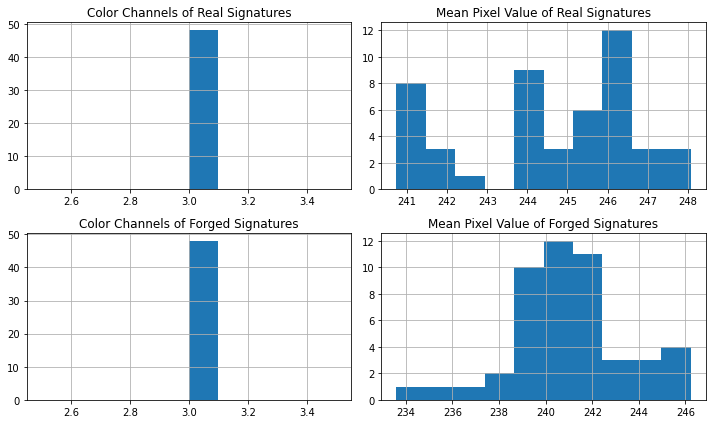

In [35]:
fig, axs = plt.subplots(2, 2, figsize=(10, 6))
image_data[image_data['Type'] == 'Real']['Color Channels'].hist(ax=axs[0, 0])
image_data[image_data['Type'] == 'Forged']['Color Channels'].hist(ax=axs[1, 0])
image_data[image_data['Type'] == 'Real']['Mean Pixel Value'].hist(ax=axs[0, 1])
image_data[image_data['Type'] == 'Forged']['Mean Pixel Value'].hist(ax=axs[1, 1])

axs[0, 0].set_title("Color Channels of Real Signatures")
axs[0, 1].set_title("Mean Pixel Value of Real Signatures")
axs[1, 0].set_title("Color Channels of Forged Signatures")
axs[1, 1].set_title("Mean Pixel Value of Forged Signatures")

plt.tight_layout()
plt.show()


In [15]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# load the data
(train_data, train_labels), (test_data, test_labels) = keras.datasets.mnist.load_data()

# preprocess the data
train_data = train_data.reshape((train_data.shape[0], train_data.shape[1], train_data.shape[2] * 1))
test_data = test_data.reshape((test_data.shape[0], test_data.shape[1], test_data.shape[2] * 1))
train_data = train_data.astype('float32') / 255
test_data = test_data.astype('float32') / 255

# define the model
model = keras.Sequential([
    layers.LSTM(32, input_shape=(train_data.shape[1], train_data.shape[2])),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

# define callbacks


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 32)                7808      
                                                                 
 dense (Dense)               (None, 10)                330       
                                                                 
Total params: 8,138
Trainable params: 8,138
Non-trainable params: 0
_________________________________________________________________


Epoch 1/10
1500/1500 [==============================] - 14s 8ms/step - loss: 0.7612 - accuracy: 0.7592 - val_loss: 0.3597 - val_accuracy: 0.8954
Epoch 2/10
1500/1500 [==============================] - 20s 13ms/step - loss: 0.2724 - accuracy: 0.9216 - val_loss: 0.2076 - val_accuracy: 0.9413
Epoch 3/10
1500/1500 [==============================] - 17s 12ms/step - loss: 0.1874 - accuracy: 0.9445 - val_loss: 0.1824 - val_accuracy: 0.9486
Epoch 4/10
1500/1500 [==============================] - 13s 9ms/step - loss: 0.1509 - accuracy: 0.9560 - val_loss: 0.1402 - val_accuracy: 0.9624
Epoch 5/10
1500/1500 [==============================] - 16s 11ms/step - loss: 0.1242 - accuracy: 0.9635 - val_loss: 0.1222 - val_accuracy: 0.9651
Epoch 6/10
1500/1500 [==============================] - 15s 10ms/step - loss: 0.1086 - accuracy: 0.9680 - val_loss: 0.1065 - val_accuracy: 0.9688
Epoch 7/10
1500/1500 [==============================] - 12s 8ms/step - loss: 0.0959 - accuracy: 0.9713 - val_loss: 0.1033 - va

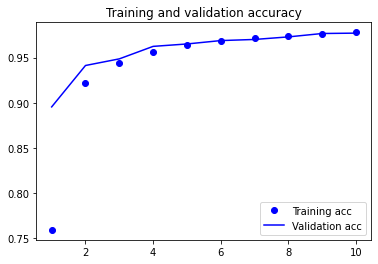

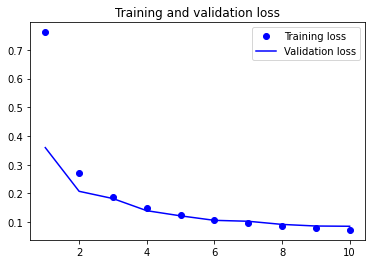

In [16]:
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

# train the model
history = model.fit(train_data, train_labels, batch_size=32, epochs=10, validation_split=.2, callbacks=[early_stop])

# plot accuracy and loss
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [17]:
# train the model
history = model.fit(train_data, train_labels, batch_size=32, epochs=10, validation_split=.2, callbacks=[early_stop])

# get the final loss and accuracy
final_loss, final_accuracy = model.evaluate(test_data, test_labels)

# print the results in percentage form
print("Final Loss: {:.2f}%".format(final_loss * 100))
print("Final Accuracy: {:.2f}%".format(final_accuracy * 100))


Epoch 1/10
1500/1500 [==============================] - 14s 9ms/step - loss: 0.0682 - accuracy: 0.9799 - val_loss: 0.0879 - val_accuracy: 0.9774
Epoch 2/10
1500/1500 [==============================] - 14s 9ms/step - loss: 0.0639 - accuracy: 0.9811 - val_loss: 0.0738 - val_accuracy: 0.9792
Epoch 3/10
1500/1500 [==============================] - 13s 8ms/step - loss: 0.0605 - accuracy: 0.9827 - val_loss: 0.0761 - val_accuracy: 0.9784
Epoch 4/10
1500/1500 [==============================] - 13s 9ms/step - loss: 0.0561 - accuracy: 0.9829 - val_loss: 0.0770 - val_accuracy: 0.9790
Epoch 5/10
313/313 [==============================] - 2s 4ms/step - loss: 0.0766 - accuracy: 0.9777
Final Loss: 7.66%
Final Accuracy: 97.77%


In [18]:
import seaborn as sns
def plot_confusion_matrix(cf_matrix):
  
    group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]

    axes_labels=['Forged', 'Authentic']
    labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot=labels, fmt='',cmap="flare" , xticklabels=axes_labels, yticklabels=axes_labels)

    plot_xlabel = plt.xlabel('Predicted labels', fontsize = 13)
    plot_ylabel = plt.ylabel('True labels', fontsize = 13)
    plot_title = plt.title('Confusion Matrix', fontsize= 10,fontweight='bold')

In [19]:
from sklearn.metrics import confusion_matrix, classification_report
Y_pred = np.argmax(model.predict(test_data),axis=1)
print('Confusion Matrix')
print(confusion_matrix(test_labels, Y_pred))
print('Classification Report')
print(classification_report(test_labels, Y_pred))

Confusion Matrix
[[ 970    0    5    1    1    0    1    0    2    0]
 [   1 1119    2    2    0    0    2    4    5    0]
 [   2    2 1009   12    1    0    1    3    2    0]
 [   0    0    0  994    0    5    0    3    4    4]
 [   3    1    2    1  957    1    5    2    1    9]
 [   0    0    1   11    0  872    1    0    5    2]
 [   4    3    1    0    4    8  934    0    4    0]
 [   1    1    9    6    0    0    0  997    4   10]
 [   2    0    2    8    1    6    2    2  950    1]
 [   7    0    0    6    6    2    0    2   11  975]]
Classification Report
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       980
           1       0.99      0.99      0.99      1135
           2       0.98      0.98      0.98      1032
           3       0.95      0.98      0.97      1010
           4       0.99      0.97      0.98       982
           5       0.98      0.98      0.98       892
           6       0.99      0.97      0.98       9

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 28, 64)           15616     
 l)                                                              
                                                                 
 bidirectional_1 (Bidirectio  (None, 64)               24832     
 nal)                                                            
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
Total params: 41,098
Trainable params: 41,098
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
1500/1500 [==============================] - 34s 20ms/step - loss: 0.5310 - accuracy: 0.8282 - val_loss: 0.1852 - val_accuracy: 0.9427
Epoch 2/10
1500/1500 [==============

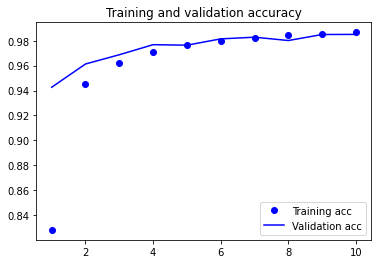

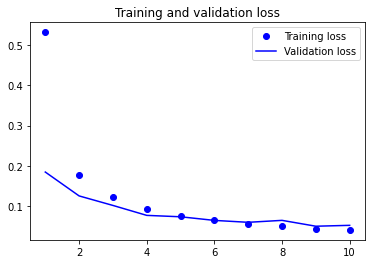

In [27]:
#Bi-directional Recurrent Neural Network (B-RNN)
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# load the data
(train_data, train_labels), (test_data, test_labels) = keras.datasets.mnist.load_data()

# preprocess the data
train_data = train_data.reshape((train_data.shape[0], train_data.shape[1], train_data.shape[2] * 1))
test_data = test_data.reshape((test_data.shape[0], test_data.shape[1], test_data.shape[2] * 1))
train_data = train_data.astype('float32') / 255
test_data = test_data.astype('float32') / 255

# define the model
model = keras.Sequential([
    layers.Bidirectional(layers.LSTM(32, dropout=0.1, return_sequences=True), input_shape=(train_data.shape[1], train_data.shape[2])),
    layers.Bidirectional(layers.LSTM(32, dropout=0.1)),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

# define callbacks
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)
history = model.fit(train_data, train_labels, batch_size=32, epochs=10, validation_split=.2, callbacks=[early_stop])

# plot accuracy and loss
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [28]:
# get the final loss and accuracy
final_loss, final_accuracy = model.evaluate(test_data, test_labels)

# print the results in percentage form
print("Final Loss: {:.2f}%".format(final_loss * 100))
print("Final Accuracy: {:.2f}%".format(final_accuracy * 100))

313/313 [==============================] - 3s 7ms/step - loss: 0.0454 - accuracy: 0.9861
Final Loss: 4.54%
Final Accuracy: 98.61%


In [29]:
import seaborn as sns
def plot_confusion_matrix(cf_matrix):
  
    group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]

    axes_labels=['Forged', 'Authentic']
    labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot=labels, fmt='',cmap="flare" , xticklabels=axes_labels, yticklabels=axes_labels)

    plot_xlabel = plt.xlabel('Predicted labels', fontsize = 13)
    plot_ylabel = plt.ylabel('True labels', fontsize = 13)
    plot_title = plt.title('Confusion Matrix', fontsize= 10,fontweight='bold')

In [30]:
from sklearn.metrics import confusion_matrix, classification_report
Y_pred = np.argmax(model.predict(test_data),axis=1)
print('Confusion Matrix')
print(confusion_matrix(test_labels, Y_pred))
print('Classification Report')
print(classification_report(test_labels, Y_pred))

Confusion Matrix
[[ 972    0    0    1    3    0    2    1    0    1]
 [   0 1130    0    1    1    0    1    1    1    0]
 [   1    1 1020    5    2    0    0    1    1    1]
 [   0    0    2 1004    0    0    0    3    1    0]
 [   0    0    1    0  976    0    0    1    0    4]
 [   0    1    0   11    1  872    1    1    3    2]
 [   1    2    0    0    6    6  941    0    2    0]
 [   0    5    7    1    4    0    0 1003    0    8]
 [   1    1    2    5    3    3    0    3  956    0]
 [   1    0    0    2   11    2    0    5    1  987]]
Classification Report
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.99      0.99      0.99      1032
           3       0.97      0.99      0.98      1010
           4       0.97      0.99      0.98       982
           5       0.99      0.98      0.98       892
           6       1.00      0.98      0.99       9

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)              

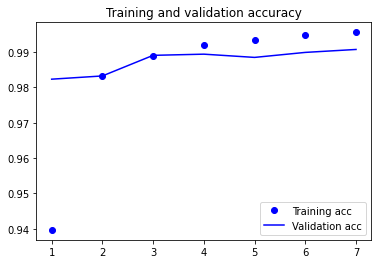

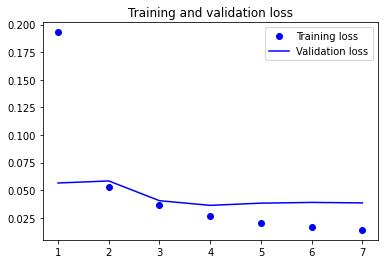

In [31]:
#Convolutional Recurrent Neural Network (CRNN)
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# load the data
(train_data, train_labels), (test_data, test_labels) = keras.datasets.mnist.load_data()

# preprocess the data
train_data = train_data.reshape((train_data.shape[0], 28, 28, 1))
test_data = test_data.reshape((test_data.shape[0], 28, 28, 1))
train_data = train_data.astype('float32') / 255
test_data = test_data.astype('float32') / 255

# define the model
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax'),
])

model.compile(optimizer='rmsprop',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

# define callbacks
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

# train the model
history = model.fit(train_data, train_labels, batch_size=64, epochs=10, validation_split=.2, callbacks=[early_stop])

# plot accuracy and loss
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [32]:
# get the final loss and accuracy
final_loss, final_accuracy = model.evaluate(test_data, test_labels)

# print the results in percentage form
print("Final Loss: {:.2f}%".format(final_loss * 100))
print("Final Accuracy: {:.2f}%".format(final_accuracy * 100))

313/313 [==============================] - 2s 5ms/step - loss: 0.0317 - accuracy: 0.9909
Final Loss: 3.17%
Final Accuracy: 99.09%


In [33]:
import seaborn as sns
def plot_confusion_matrix(cf_matrix):
  
    group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in cf_matrix.flatten()/np.sum(cf_matrix)]

    axes_labels=['Forged', 'Authentic']
    labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, annot=labels, fmt='',cmap="flare" , xticklabels=axes_labels, yticklabels=axes_labels)

    plot_xlabel = plt.xlabel('Predicted labels', fontsize = 13)
    plot_ylabel = plt.ylabel('True labels', fontsize = 13)
    plot_title = plt.title('Confusion Matrix', fontsize= 10,fontweight='bold')

In [34]:
from sklearn.metrics import confusion_matrix, classification_report
Y_pred = np.argmax(model.predict(test_data),axis=1)
print('Confusion Matrix')
print(confusion_matrix(test_labels, Y_pred))
print('Classification Report')
print(classification_report(test_labels, Y_pred))

Confusion Matrix
[[ 978    0    0    0    1    0    0    1    0    0]
 [   0 1133    0    1    0    0    1    0    0    0]
 [   2    1 1017    0    1    0    1   10    0    0]
 [   0    1    1 1002    0    5    0    0    1    0]
 [   0    0    0    0  969    0    3    0    4    6]
 [   2    0    0    3    0  884    1    0    2    0]
 [   4    2    0    0    2    5  943    0    2    0]
 [   0    3    1    0    0    0    0 1022    1    1]
 [   1    0    2    2    0    1    0    0  967    1]
 [   1    1    1    1    4    3    0    2    2  994]]
Classification Report
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      1.00      1135
           2       1.00      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.99      0.99       892
           6       0.99      0.98      0.99       9